# inspect the raw data from single molecule model. August dataset. 3 molecules / 100 / no noise

## read into the raw data

In [1]:
# data loading 

import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random

In [2]:
# read into the data

def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data

In [3]:
# visualize
def visusalizeIMG(n_slice, test_img, test_msk):
    # n_slice = random.randint(0, test_img.shape[2])
    plt.figure(figsize=(8, 8))

    plt.subplot(121)
    plt.imshow(test_img[n_slice,:,:], cmap='gray')
    # plt.title('focal slice')
    plt.subplot(122)
    plt.imshow(test_msk[n_slice,:,:], cmap='gray')
    # plt.title('GT slice')
    plt.show()

In [5]:
# Data path

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

img_list = os.listdir(img_dir)
msk_list = os.listdir(mask_dir)

num_images = len(os.listdir(img_dir))
print(num_images)

300


In [6]:
# inspect the single raw file

i = 0
test_img = readMRC(img_dir + img_list[i])
test_msk = readMRC(mask_dir + msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))

image: (100, 100, 100) 5.4200516 -0.55708694
GT: (100, 100, 100) 13.433581 -0.11642523


D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:209: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


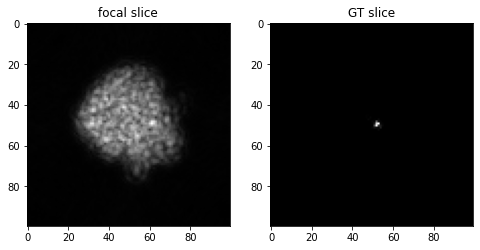

In [11]:
# visualize

# n_slice = random.randint(0, test_img.shape[2])
n_slice = 

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(test_img[n_slice,:,:], cmap='gray')
plt.title('focal slice')
plt.subplot(122)
plt.imshow(test_msk[n_slice,:,:], cmap='gray')
plt.title('GT slice')
plt.show()

## read into the processed nii file

In [ ]:
import SimpleITK as sitk

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, fixed
import os

image = sitk.ReadImage('./Data_folder_norm/images/val/image0.nii')  # 整理过之后的数据
imageShow = sitk.GetArrayViewFromImage(image)
label = sitk.ReadImage('./Data_folder_norm/labels/val/label0.nii')
labelShow = sitk.GetArrayViewFromImage(label)


In [ ]:
print('image nii:', imageShow.shape, np.max(imageShow), np.min(imageShow))
print('GT nii:', labelShow.shape, np.max(labelShow), np.min(labelShow))

In [ ]:
n_slice = random.randint(0, imageShow.shape[2])

visusalizeIMG(n_slice, imageShow, labelShow) 

## pre-processing for raw data

In [12]:
# data loading 

import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random

In [13]:
# read into the data

def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data


# Data path

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

img_list = os.listdir(img_dir)
msk_list = os.listdir(mask_dir)

num_images = len(os.listdir(img_dir))
print(num_images)

300


In [14]:
# inspect the single raw file

i = 0
test_img = readMRC(img_dir + img_list[i])
test_msk = readMRC(mask_dir + msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))
print(test_msk.dtype)


image: (100, 100, 100) 5.4200516 -0.55708694
GT: (100, 100, 100) 13.433581 -0.11642523
float32


### Normalize

In [22]:
# normalize the data in case the real data artifacts

# normalize into [0, 1]

def normStack(imageStack):
    
    Range = np.max(imageStack) - np.min(imageStack)
    normTemp = ((imageStack - np.min(imageStack))/Range - 0.5) * 2 
    
    return (normTemp +1)/2

0.0 1.0


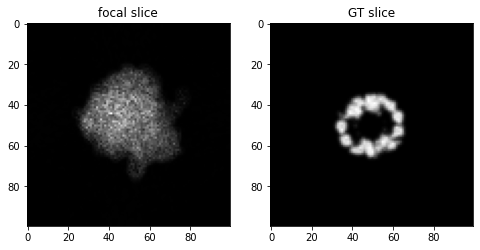

In [24]:
test_image_norm = normStack(test_img)
test_mask_norm = normStack(test_msk)

print(test_image_norm.min(), test_image_norm.max())

# n_slice = random.randint(0, test_img.shape[2])
n_slice = 50

visusalizeIMG(n_slice, test_image_norm, test_mask_norm)

### Rescale

In [17]:
# manually rescale the data
# scale between [0,1] with sklearn

test_image_manual = np.interp(test_img, (test_img.min(), test_img.max()), (0, 1))
test_mask_manual = np.interp(test_msk, (test_msk.min(), test_msk.max()), (0, 1))

print(test_image_manual.shape, test_image_manual.min(), test_image_manual.max()) 
print(test_mask_manual.shape, test_mask_manual.min(), test_mask_manual.max()) 

(100, 100, 100) 0.0 1.0
(100, 100, 100) 0.0 1.0


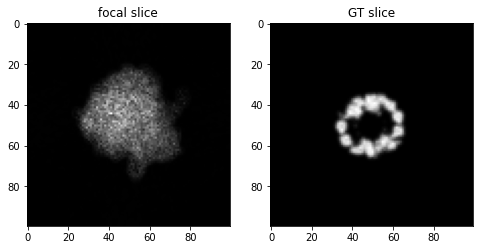

In [18]:
# n_slice = random.randint(0, test_img.shape[2])
n_slice = 50

visusalizeIMG(n_slice, test_image_manual, test_mask_manual)

### Directly read in as uint8

In [19]:
# read in as type uint8

# inspect the single raw file

i = 0
test_img_uint8 = readMRC(img_dir + img_list[i]) #.astype(np.uint8)
test_msk_uint8 = readMRC(mask_dir + msk_list[i]).astype(np.uint8)

print('image:', test_img_uint8.shape, np.max(test_img_uint8), np.min(test_img_uint8))
print('GT:', test_msk_uint8.shape, np.max(test_msk_uint8), np.min(test_msk_uint8))

image: (100, 100, 100) 5.4200516 -0.55708694
GT: (100, 100, 100) 13 0


D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


In [20]:
print(np.unique(test_msk_uint8))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


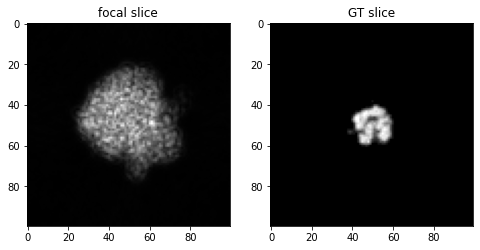

In [21]:
n_slice = random.randint(0, test_img.shape[2])

visusalizeIMG(n_slice, test_img_uint8, test_msk_uint8) 

## raw data pre-processing

In [25]:
import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random
import glob

In [33]:
# read into the data
def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data

# visualize
def visusalizeIMG(n_slice, test_img, test_msk):
    # n_slice = random.randint(0, test_img.shape[2])
    plt.figure(figsize=(8, 8))

    plt.subplot(121)
    plt.imshow(test_img[n_slice,:,:], cmap='gray')
    plt.title('focal slice')
    plt.subplot(122)
    plt.imshow(test_msk[n_slice,:,:], cmap='gray')
    plt.title('GT slice')
    plt.show()
    
# normalize into [0, 1]
def normStack(imageStack):
    
    Range = np.max(imageStack) - np.min(imageStack)
    normTemp = ((imageStack - np.min(imageStack))/Range - 0.5) * 2 
    
    return (normTemp +1)/2

In [32]:
# Data path
from natsort import natsorted # sorted as the ascending order

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

# img_list = os.listdir(img_dir)
# msk_list = os.listdir(mask_dir)

img_list = natsorted(glob.glob(img_dir + '/*focal.mrc'))
msk_list = natsorted(glob.glob(mask_dir + '/*gt.mrc'))

num_images = len(img_list)
print(num_images)
# print(msk_list[:5])

300
['H:/My Drive/rawData/MDC_HZDR/simulation_20220818/GT\\001_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/GT\\002_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/GT\\003_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/GT\\004_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/GT\\005_gt.mrc']


image: (100, 100, 100) 5.4139957 -0.59305215
GT: (100, 100, 100) 8.072163 -0.29160166
slice num: 27


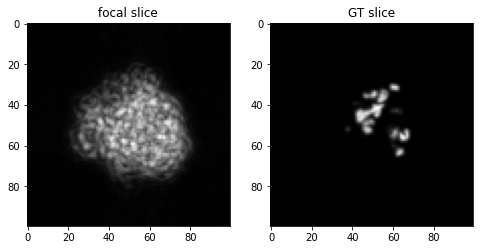

In [31]:
# inspect the single raw file

i = 0
test_img = readMRC(img_list[i])
test_msk = readMRC(msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))

n_slice = random.randint(0, test_img.shape[2]-1)
print('slice num:', n_slice)
visusalizeIMG(n_slice, test_img, test_msk)

### Normalize the data

0.0 1.0
current slice: 50


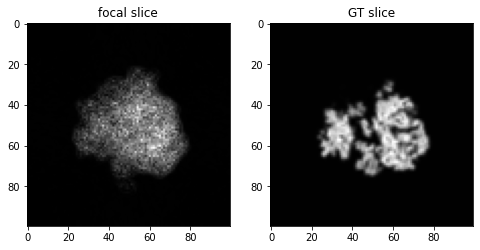

In [35]:
test_image_manual = normStack(test_img)
test_mask_manual = normStack(test_msk)

print(test_image_manual.min(), test_image_manual.max())

# n_slice = random.randint(0, test_img.shape[2]-1)
n_slice = 50

print('current slice:', n_slice)
visusalizeIMG(n_slice, test_image_manual, test_mask_manual)


(100, 100, 100) 0.0 1.0
(100, 100, 100) 0.0 1.0


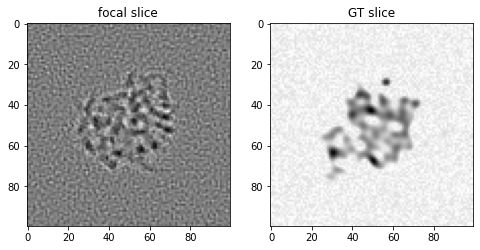

In [10]:
# # rescale the image into [0,1]

# test_image_manual = np.interp(test_img, (test_img.min(), test_img.max()), (0, 1))
# test_mask_manual = np.interp(test_msk, (test_msk.min(), test_msk.max()), (0, 1))

# print(test_image_manual.shape, test_image_manual.min(), test_image_manual.max()) 
# print(test_mask_manual.shape, test_mask_manual.min(), test_mask_manual.max()) 

# n_slice = random.randint(0, test_img.shape[2])
# visusalizeIMG(n_slice, test_image_manual, test_mask_manual)

In [14]:
print((np.unique(test_mask_manual)).shape)

(991062,)


76


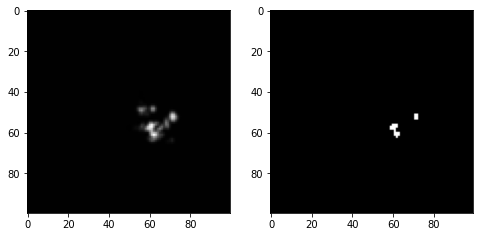

In [70]:
# binary the mask

test_mask_bi = (test_mask_manual > 0.45).astype(int)

n_slice = random.randint(0, test_img.shape[2]-1)
# n_slice = 50
print(n_slice)
visusalizeIMG(n_slice, test_mask_manual, test_mask_bi)

In [72]:
# crop the data to enhance SNR

print('label:', np.unique(test_mask_bi))

val, counts = np.unique(test_mask_bi, return_counts=True)
ratio = 1 - (counts[0]/counts.sum())  # counts the True bool
print('before cut useful information:', np.round(ratio, 3))

test_mask_bi_cut = test_mask_bi[18:82, 18:82, 18:82]
test_image_cut = test_image_manual[18:82, 18:82, 18:82]

val, counts = np.unique(test_mask_bi_cut, return_counts=True)
ratio = 1 - (counts[0]/counts.sum())  # how many 1 elements inside
print('after cut information:', np.round(ratio, 3))

label: [0 1]
before cut useful information: 0.031
after cut information: 0.119


52


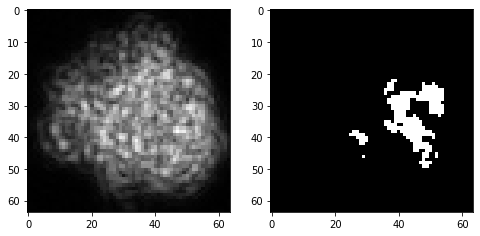

In [73]:
# visualize

n_slice = random.randint(0, test_image_cut.shape[2]-1)
# n_slice = 80
print(n_slice)
visusalizeIMG(n_slice, test_image_cut, test_mask_bi_cut)

In [74]:
# change image into correct channel; assign the category for masks
from tensorflow.keras.utils import to_categorical

combined_x = np.stack([test_image_cut], axis = 3)  # axis为3则增加一个维度
print(combined_x.shape)

print('before category:', test_mask_bi_cut.shape)
test_mask_bi_cut = to_categorical(test_mask_bi_cut, num_classes=2) 
print('after category:', test_mask_bi_cut.shape, np.unique(test_mask_bi_cut))

(64, 64, 64, 1)
before category: (64, 64, 64)
after category: (64, 64, 64, 2) [0. 1.]


## Check the saved file

In [95]:
import os
import glob
from natsort import natsorted

train_img_dir = './data/2022_08/inputData/test/images/'
train_msk_dir = './data/2022_08/inputData/test/masks/'

img_list = sorted(glob.glob(train_img_dir + '/*.npy'))
msk_list = sorted(glob.glob(train_msk_dir + '/*.npy'))

num_images = len(img_list)
print(num_images)

100


In [96]:
# load and visualize

i = 0
test_img = np.load(img_list[i])
test_msk = np.load(msk_list[i])

print(test_img.shape, test_msk.shape)



(64, 64, 64, 1) (64, 64, 64, 2)


In [97]:
print('before:', test_msk.shape)
test_msk_argmax = np.argmax(test_msk, axis=3) # convert onehot back to integer
print('after:', test_msk_argmax.shape)

test_img = test_img[...,0]
print(test_img.shape)

before: (64, 64, 64, 2)
after: (64, 64, 64)
(64, 64, 64)


37


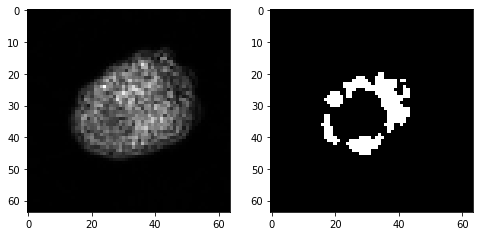

In [105]:
n_slice = random.randint(0, test_img.shape[1]-1)
# n_slice = 80
print(n_slice)

visusalizeIMG(n_slice, test_img, test_msk_argmax)

## Generate the test dataset seperately

In [93]:
# use completely new molecules for testing

# Data path
from natsort import natsorted # sorted as the ascending order

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

# img_list = os.listdir(img_dir)
# msk_list = os.listdir(mask_dir)

img_list = natsorted(glob.glob(img_dir + '/*focal.mrc'))
msk_list = natsorted(glob.glob(mask_dir + '/*gt.mrc'))

num_images = len(img_list)
print(num_images)
# print(msk_list[:5])

100
['H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/GT\\201_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/GT\\202_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/GT\\203_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/GT\\204_gt.mrc', 'H:/My Drive/rawData/MDC_HZDR/simulation_20220818/test/GT\\205_gt.mrc']


In [94]:

SAVED_PATH = 'E:/EM/demo/3D_Unet_keras/data/2022_08/inputData/test/'
crop_size = [18, 82]
THRESHOLD = 0.45


for num in range(num_images):

    temp_img = readMRC(img_list[num])
    temp_msk = readMRC(msk_list[num])

    # # rescale into [0,1]
    # temp_img = np.interp(temp_img, (temp_img.min(), temp_img.max()), (0, 1))
    # temp_msk = np.interp(temp_msk, (temp_msk.min(), temp_msk.max()), (0, 1))

    # normalize the data [0, 1]
    temp_img = normStack(temp_img)
    temp_msk = normStack(temp_msk)

    # binary the mask
    # temp_msk = (temp_msk < args.threshold).astype(int)  # for the 07.2022 data < 0.825
    temp_msk = (temp_msk > THRESHOLD).astype(int)  # for the 08.2022 data > 0.45

    # crop the stack 
    temp_msk = temp_msk[crop_size[0]:crop_size[1], crop_size[0]:crop_size[1], crop_size[0]:crop_size[1]]
    temp_img = temp_img[crop_size[0]:crop_size[1], crop_size[0]:crop_size[1], crop_size[0]:crop_size[1]]

    # adjust the data format
    # temp_img = np.stack([temp_img, temp_img, temp_img], axis = 3) # use for transfer learning in 3 channels
    temp_img = np.stack([temp_img], axis = 3)
    temp_msk = to_categorical(temp_msk, num_classes=2) 

    # save file
    val, counts = np.unique(temp_msk, return_counts=True)

    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        # print("Save Me:", num)
        np.save(SAVED_PATH + 'images/image_'+str(num)+'.npy', temp_img)
        np.save(SAVED_PATH + 'masks/mask_'+str(num)+'.npy', temp_msk)

    else:
        print("too low SNR:", num)

D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:209: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


## Data augmentation and pre-processing

In [4]:
# make the data augmentation for training on small dataset
import SimpleITK as sitk
import numpy as np
import torchio as tio

In [5]:
# load in data

DATA_PATH ='E:/EM/demo/3D_Unet_keras/data/2022_08/inputData/'

original_image = np.load(DATA_PATH + 'train/images/' + 'image_0.npy')
slice_image = original_image[0:63:4,:,:,:]  # start"stop:step, every 4th slice took from stack
print(original_image.shape, original_image.max(), slice_image.shape)

(64, 64, 64, 1) 0.9630156871982707 (16, 64, 64, 1)


### Simpleitk 

In [13]:
import SimpleITK as sitk

def resample_sitk_image(sitk_image, spacing=None, interpolator=None, fill_value=0):
    # https://github.com/SimpleITK/SlicerSimpleFilters/blob/master/SimpleFilters/SimpleFilters.py
    _SITK_INTERPOLATOR_DICT = {
        'nearest': sitk.sitkNearestNeighbor,
        'linear': sitk.sitkLinear,
        'gaussian': sitk.sitkGaussian,
        'label_gaussian': sitk.sitkLabelGaussian,
        'bspline': sitk.sitkBSpline,
        'hamming_sinc': sitk.sitkHammingWindowedSinc,
        'cosine_windowed_sinc': sitk.sitkCosineWindowedSinc,
        'welch_windowed_sinc': sitk.sitkWelchWindowedSinc,
        'lanczos_windowed_sinc': sitk.sitkLanczosWindowedSinc
    }

    if isinstance(sitk_image, str):
        sitk_image = sitk.ReadImage(sitk_image)
    
    # Roy 从sitk拿出图像部分
    # sitk_image = sitk.GetImageFromArray(sitk_image)
    num_dim = sitk_image.GetDimension()

    if not interpolator:
        interpolator = 'linear'
        pixelid = sitk_image.GetPixelIDValue()

        if pixelid not in [1, 2, 4]:
            raise NotImplementedError(
                'Set `interpolator` manually, '
                'can only infer for 8-bit unsigned or 16, 32-bit signed integers')
        if pixelid == 1:  # 8-bit unsigned int
            interpolator = 'nearest'

    orig_pixelid = sitk_image.GetPixelIDValue()
    orig_origin = sitk_image.GetOrigin()
    orig_direction = sitk_image.GetDirection()
    orig_spacing = np.array(sitk_image.GetSpacing())
    orig_size = np.array(sitk_image.GetSize(), dtype=np.int)

    if not spacing:
        min_spacing = orig_spacing.min()
        new_spacing = [min_spacing] * num_dim
    else:
        new_spacing = [float(s) for s in spacing]

    assert interpolator in _SITK_INTERPOLATOR_DICT.keys(), \
        '`interpolator` should be one of {}'.format(_SITK_INTERPOLATOR_DICT.keys())

    sitk_interpolator = _SITK_INTERPOLATOR_DICT[interpolator]

    new_size = orig_size * (orig_spacing / new_spacing)
    new_size = np.ceil(new_size).astype(np.int)  # Image dimensions are in integers
    new_size = [int(s) for s in new_size]  # SimpleITK expects lists, not ndarrays

    resample_filter = sitk.ResampleImageFilter()

    resample_filter.SetOutputSpacing(new_spacing)
    resample_filter.SetSize(new_size)
    resample_filter.SetOutputDirection(orig_direction)
    resample_filter.SetOutputOrigin(orig_origin)
    resample_filter.SetTransform(sitk.Transform())
    resample_filter.SetDefaultPixelValue(orig_pixelid)
    resample_filter.SetInterpolator(sitk_interpolator)
    resample_filter.SetDefaultPixelValue(fill_value)

    resampled_sitk_image = resample_filter.Execute(sitk_image)

    return resampled_sitk_image

def from_numpy_to_itk(image_np, image_itk):

    # read image file
    reader = sitk.ImageFileReader()
    reader.SetFileName(image_itk)
    image_itk = reader.Execute()

    image_np = np.transpose(image_np, (2, 1, 0))
    image = sitk.GetImageFromArray(image_np)
    image.SetDirection(image_itk.GetDirection())
    image.SetSpacing(image_itk.GetSpacing())
    image.SetOrigin(image_itk.GetOrigin())
    return image

In [23]:
# test_image = original_image[:,:63,:62]
test_image = slice_image
print(test_image.shape)

img_stk = sitk.GetImageFromArray(test_image, isVector=True)
print('stk image shape:', img_stk.GetSize())

# rescaling
img_afterAug = resample_sitk_image(img_stk, spacing=[1, 1, 0.25], interpolator='linear', fill_value=0)
print(img_afterAug.GetSize())

img_aug = sitk.GetArrayFromImage(img_afterAug)
print(img_aug.shape, img_aug.max())

(16, 64, 64, 1)
stk image shape: (64, 64, 16)
(64, 64, 64)
(64, 64, 64) 0.9613148995341806


D:\INSTALL\Anaconda\envs\EM\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
D:\INSTALL\Anaconda\envs\EM\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informa

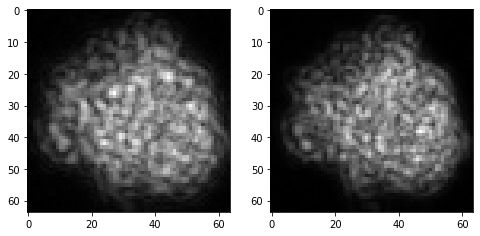

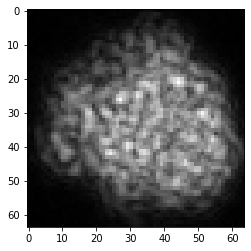

In [22]:
visusalizeIMG(15, np.squeeze(test_image), img_aug)

plt.imshow(img_aug[60,...], cmap='gray')

### Torchio; jupyter import torch will die

before swap: (3, 64, 64, 1)
after swap: (1, 3, 64, 64)


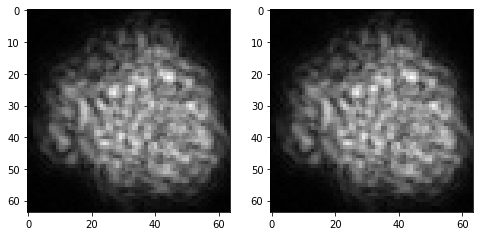

In [7]:
# load in the raw data

image_tio = original_image[:3,:,:]
print('before swap:', image_tio.shape)

# image_tio = np.transpose(image_tio, (3,2,1,0))
# image_tio = np.moveaxis(image_tio,-1,0)  # swap the last dimension with first
image_tio = np.expand_dims(np.squeeze(image_tio), axis=0)

print('after swap:',image_tio.shape)

visusalizeIMG(0, np.squeeze(original_image), np.squeeze(image_tio))

In [8]:
import torchio as tio

# image_tio = original_image.transpose((3,2,1,0))  # swap the axis
print('image io:', image_tio.shape)

trainIO = tio.ScalarImage(tensor=image_tio)
target_shape = [64,64,64]  # padding into the same size
# crop_pad = tio.CropOrPad(target_shape, padding_mode='mean')
crop_pad = tio.CropOrPad(target_shape, padding_mode='mean')
resized = crop_pad(trainIO) # padding with mean
train_padd = resized.numpy().transpose((3,1,2,0)); #train_padd = train_padd[...,0]
print(train_padd.shape)

image io: (1, 3, 64, 64)
(64, 64, 64, 1)


original slice
diff slice


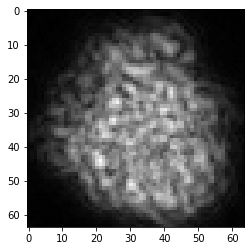

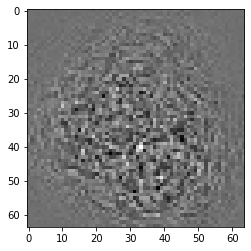

In [51]:
print('original slice')
plt.imshow(train_padd[63,...], cmap='gray')

beginn_slice = train_padd[0,...]
end_slice = train_padd[63,...]

plt.figure()
print('diff slice')
difference = end_slice - beginn_slice
plt.imshow(difference, cmap='gray')


### Augmentation. 待做

In [ ]:
# for data augmenttaion

from monai.transforms import (Activationsd,MeanEnsembled, GaussianSmoothd, CropForegroundd, ThresholdIntensityd, Activations,AsDiscrete, LoadImaged, AsChannelFirstd, VoteEnsembled, AsDiscreted, Compose, AddChanneld, Transpose, ConcatItemsd,
                              ScaleIntensityd, Resized,ToTensord, RandSpatialCropd, Rand3DElasticd, RandAffined, RandGaussianSmoothd, SpatialPadd,
    Spacingd, Orientationd, RandShiftIntensityd, BorderPadd, RandGaussianNoised, RandAdjustContrastd,NormalizeIntensityd,RandFlipd, KeepLargestConnectedComponent)

In [ ]:
import napari

viewer = napari.view_image(img_aug, channel_axis=1, ndisplay=3)